In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [7]:
df = pd.read_csv('../results/expr2.csv')
df

,p1,p2,total_query,policy,avg_cost
0,10,90,32,random,39.166667
1,10,90,32,coupcoll,38.266667
2,10,90,32,ratiocoll,36.900000
3,10,90,32,union-bound,62.222222
4,10,90,32,asymptotic,39.522528
...,...,...,...,...,...
715,90,90,5096,coupcoll,5102.066667
716,90,90,5096,ratiocoll,5096.066667
717,90,90,5096,union-bound,5662.222222
718,90,90,5096,asymptotic,5152.958005


In [8]:
x = [ 32, 64, 128, 256, 512, 1024, 2048, 5096 ]
probs = [10, 30, 50, 70, 90]
policies = ['random', 'ratiocoll', 'union-bound', 'asymptotic']

In [9]:
def plot(p1, p2):
    filtered_df = df[(df['p1'] == p1) & (df['p2'] == p2)]
    y_dict = { policy: list(filtered_df[filtered_df['policy'] == policy]['avg_cost']) for policy in policies }
    for i in range(len(policies)):
        policy = policies[i]
        if policy == 'random':
            plt.plot(x, y_dict[policy], label=policy)
        elif policy == 'union-bound' or policy == 'asymptotic':
            plt.plot(x, y_dict[policy], label=policy, linestyle='dotted')
        else:
            plt.plot(x, y_dict[policy], label=policy)
    plt.legend()
    plt.xlabel('Total Query')
    plt.ylabel('Avg Cost')
    #plt.yscale('log')
    plt.xscale('log')
    plt.title("P*1 = " + str(p1) + ", P*2 = " + str(p2))
    plt.savefig('expr2-' + str(p1) + '-' + str(p2) + '.png', bbox_inches='tight')
    plt.show()

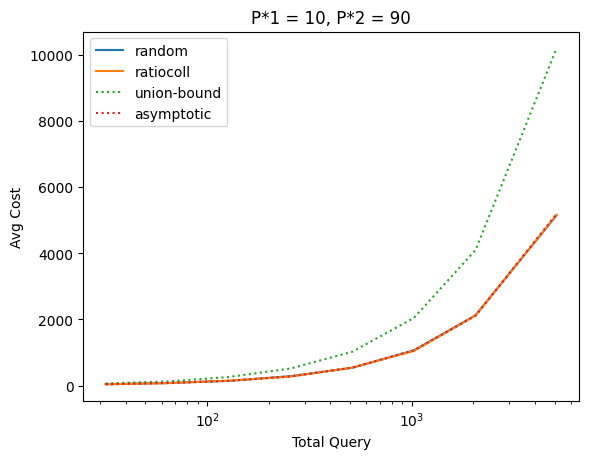

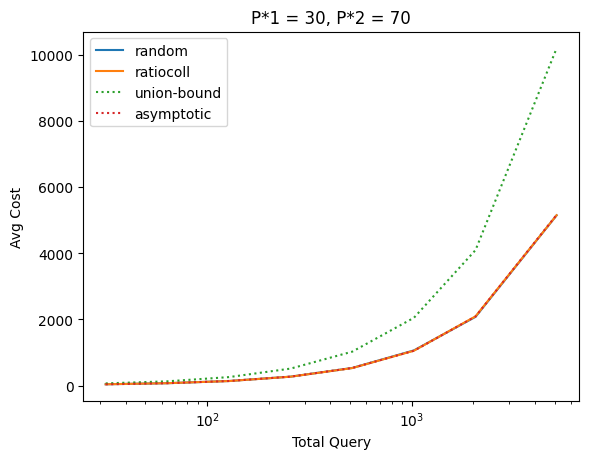

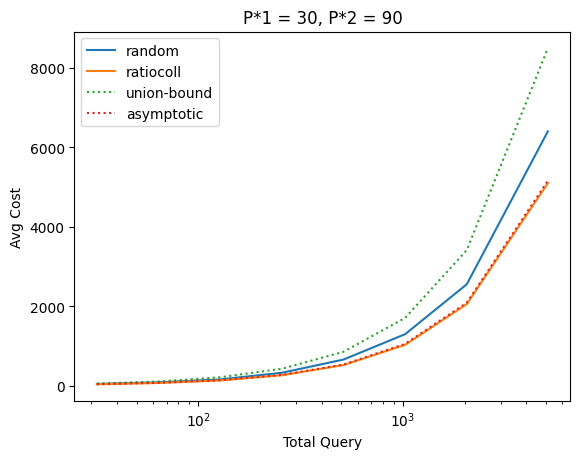

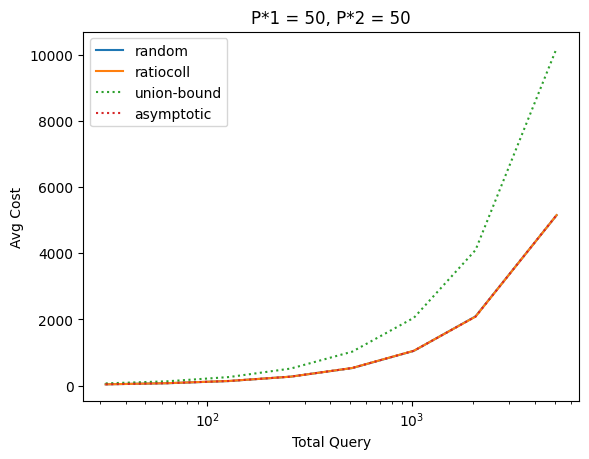

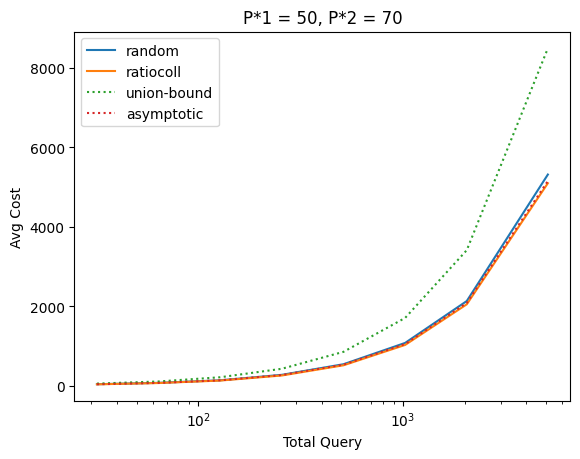

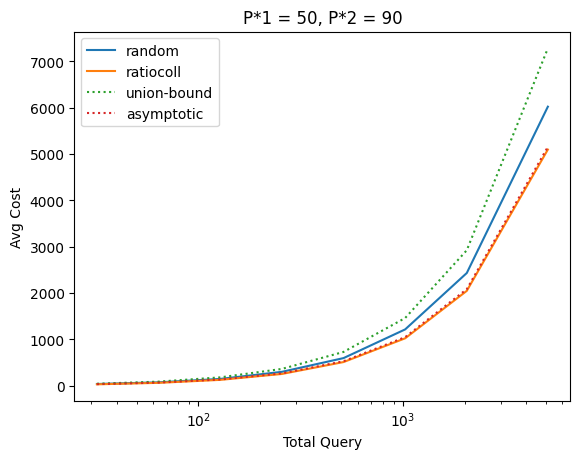

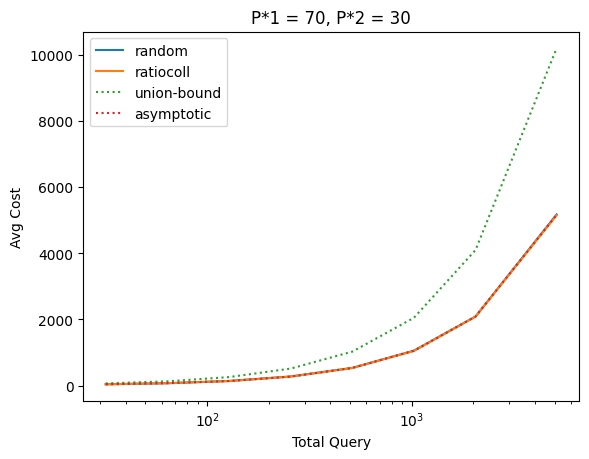

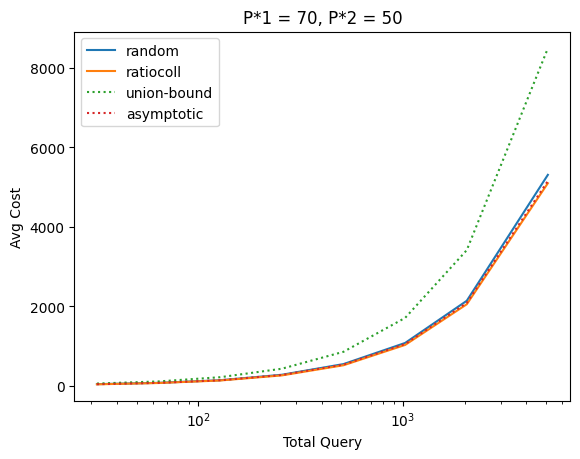

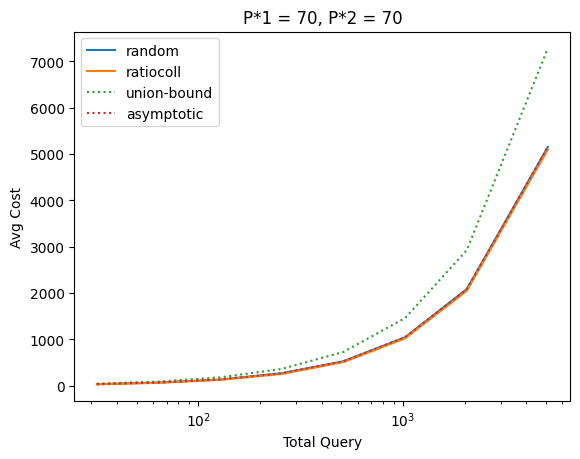

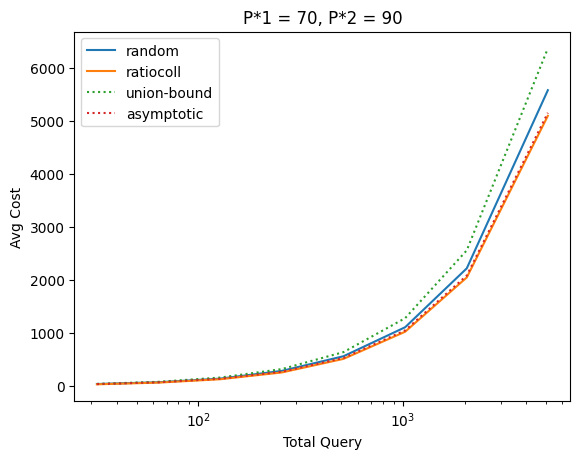

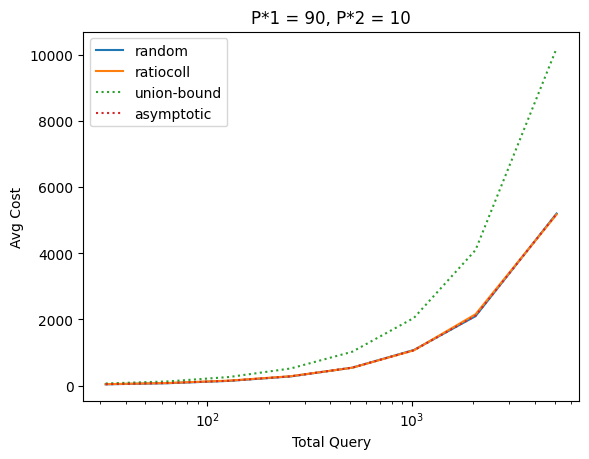

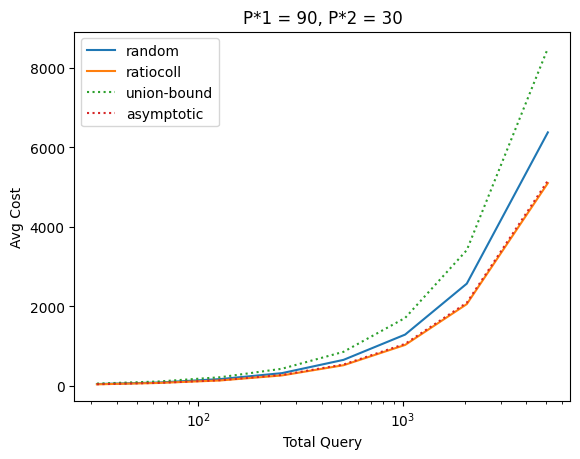

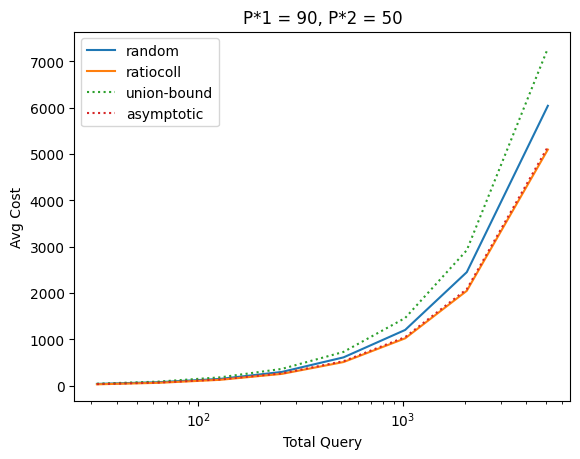

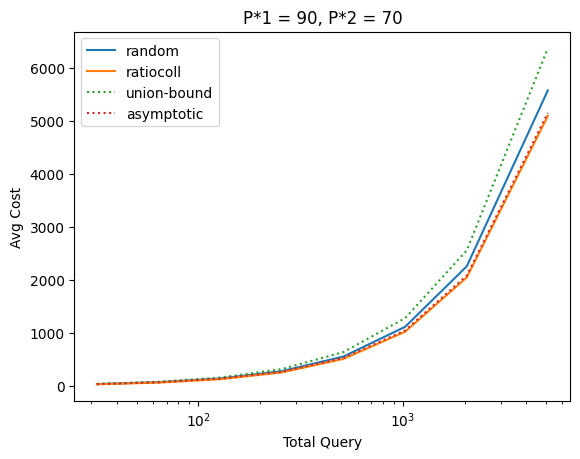

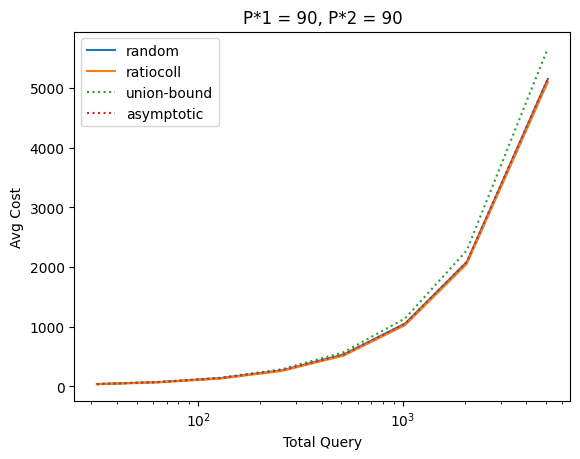

In [10]:
for p1 in probs:
    for p2 in probs:
        if p1 + p2 < 100:
            continue
        else:
            plot(p1, p2)